<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%9F%D0%A0_2_%D0%9A%D1%83%D0%B4%D1%80%D1%8F%D1%88%D0%BE%D0%B2_%D0%94_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 17. Сбор информации о финансовых результатах компаний с Forbes
Ссылка: Forbes

ПРИМЕЧАНИЕ: изначально пробовал выполнить вновь для сайта: https://www.forbes.com/real-time-billionaires/#7d15b9b3d788, после ваших слов что нужно пробовать Selenium, но данные сайт даже при скачивании страницы выводит не её данные а видо изменнёную страницу с которой я так и не смог справится и обойти что бы выдавались данные которые я вижу после перехоида на страницу. в связи с этим пришлось снова вернуться к данные с википедии.

1. Установка необходимых библиотек:

In [108]:
pip install requests beautifulsoup4 pandas matplotlib


 2. Импортирование библиотек.


In [90]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

3. Получение HTML-кода страницы.

In [60]:
# Получение HTML-кода страницы
url = 'https://ru.wikipedia.org/wiki/Forbes_Global_2000'
response = requests.get(url)
page_content = response.content

4. Парсинг HTML с помощью BeautifulSoup.

In [61]:
# Парсинг HTML-кода
soup = BeautifulSoup(page_content, 'html.parser')

# Поиск таблицы
table = soup.find('table', {'class': 'wikitable'})

# Извлечение заголовков
headers = [header.text.strip() for header in table.find_all('th')]

# Извлечение строк
data = []
for row in table.find_all('tr')[1:]:  # Пропускаем заголовок
    columns = [col.text.strip() for col in row.find_all('td')]
    if len(columns) == len(headers):  # Проверяем соответствие количества столбцов
        data.append(columns)
    else:
        print(f'Пропущена строка: {columns} (Количество столбцов: {len(columns)})')

In [62]:
# Создание DataFrame
df = pd.DataFrame(data, columns=headers)

# Проверка содержимого DataFrame
print(df.head())

   №            Компания  Осн.            Приоритетнаяотрасль Выручка Прибыль  \
0  1      JPMorgan Chase  2000               Банкинг, финансы   252,9    50,1   
1  2  Berkshire Hathaway  1955                    Конгломерат   369,0    73,4   
2  3        Saudi Aramco  1933  Нефтегазодобыча, нефтехимимия   489,1   117,0   
3  4                ICBC  1984               Банкинг, финансы   223,9    50,4   
4  5     Bank of America  1998               Банкинг, финансы   183,3    25,0   

   Активы Рыночная стоимость Сотрудников  
0  4090,7              588,1     309 926  
1  1070,0              899,1     396 500  
2   661,5             1919,3      70 000  
3  6586,0              215,2     419 252  
4  3273,8              307,3     213 000  


In [73]:
# Проверка имен столбцов
print(df.columns.tolist())

# Удаление пробелов и приведение к нижнему регистру
df.columns = df.columns.str.strip().str.lower()

# Проверка имен столбцов после очистки
print(df.columns.tolist())

# Удаляем возможные пробелы и заменяем символы
df['выручка'] = df['выручка'].str.replace(',', '', regex=False)  # Удаляем запятые (если есть)
df['выручка'] = df['выручка'].str.replace(' ', '', regex=False)  # Удаляем пробелы
df['выручка'] = pd.to_numeric(df['выручка'], errors='coerce')  # Преобразуем в числовой формат

['№', 'компания', 'осн.', 'приоритетнаяотрасль', 'выручка', 'прибыль', 'активы', 'рыночная стоимость', 'сотрудников']
['№', 'компания', 'осн.', 'приоритетнаяотрасль', 'выручка', 'прибыль', 'активы', 'рыночная стоимость', 'сотрудников']


In [74]:
# Повторная группировка
country_revenue = df.groupby('приоритетнаяотрасль')['выручка'].sum().sort_values(ascending=False)

# Проверка значений после группировки
print(country_revenue)


приоритетнаяотрасль
Нефтегазодобыча, нефтехимимия    1509.8
Торговля                         1248.0
Банкинг, финансы                 1226.7
IT                                554.5
IT, электроника                   381.6
Страхование                       379.5
Конгломерат                       369.0
Автопром                          311.9
Банкинг, финансы, страхование     144.9
Финансы                           120.1
Name: выручка, dtype: float64


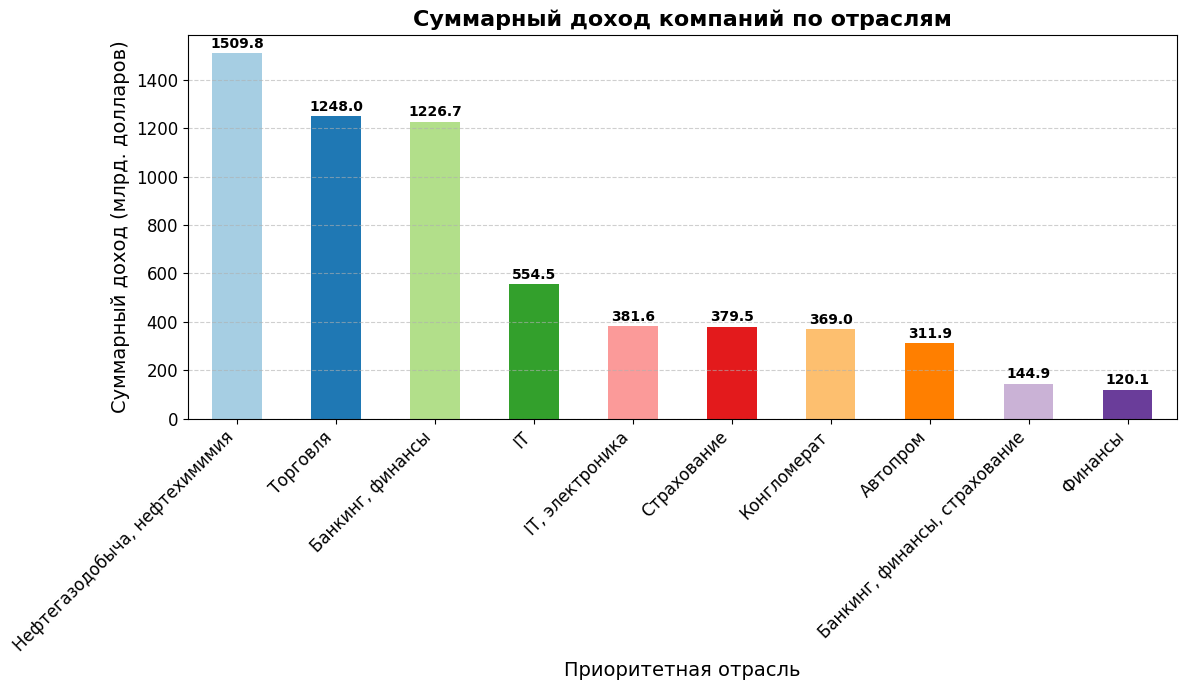

In [81]:
plt.figure(figsize=(12, 7))
country_revenue.plot(kind='bar', color=plt.cm.Paired.colors)  # Используем палитру цветов
plt.title('Суммарный доход компаний по отраслям', fontsize=16, fontweight='bold')
plt.xlabel('Приоритетная отрасль', fontsize=14)
plt.ylabel('Суммарный доход (млрд. долларов)', fontsize=14)

# Установите метки на ось X
plt.xticks(ticks=range(len(country_revenue)), labels=country_revenue.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Добавление значений на столбцы
for i, value in enumerate(country_revenue):
    plt.text(i, value + 10, f'{value:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


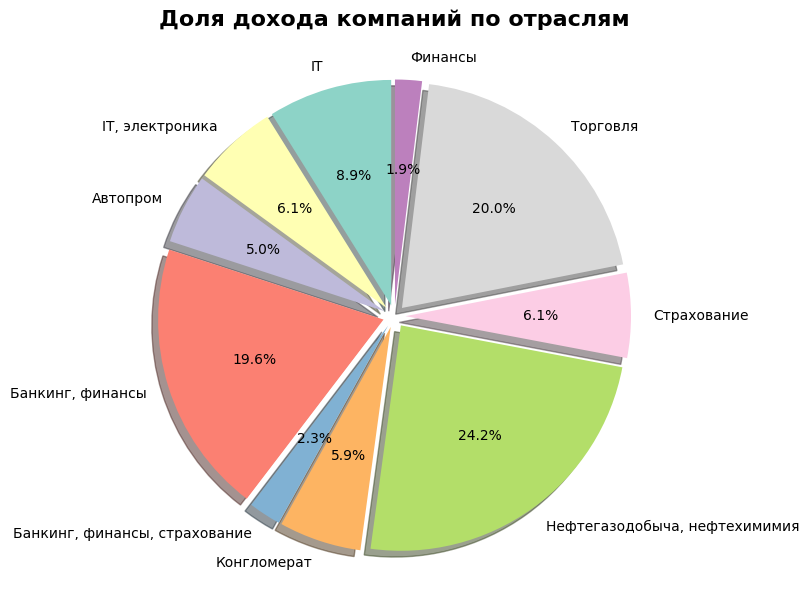

In [97]:
plt.figure(figsize=(8, 8))
industry_revenue = df.groupby('приоритетнаяотрасль')['выручка'].sum()
colors = plt.cm.Set3.colors  # Используем цветовую палитру
explode = [0.05] * len(industry_revenue)  #  смещение сегментов что б не сливалось

industry_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Доля дохода компаний по отраслям', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


Выводы на основе данных и диаграмм
Доминирующие отрасли: По данным диаграммы, наибольшую долю в доходах компаний составляют отрасли, связанные с банкингом, финансами и нефтегазодобычей. Эти отрасли приносят значительно больше прибыли по сравнению с другими, что подчеркивает их важность!

Неравномерное распределение доходов: Визуализация показывает, что доходы компаний сильно варьируются в зависимости от отрасли. Например, нефтегазодобывающие компании, такие как Saudi Aramco, имеют невероятно высокие доходы, которые в несколько раз превышают доходы других отраслей. Это связано с тем, что энергетический сектор в том числе играет ключевую роль в мировой экономике.

Высокие доходы в банковском секторе: Банковские и финансовые компании, такие как JPMorgan Chase и ICBC, также показывают стабильно высокие доходы. Это говорит о важности финансового сектора для поддержания глобальной экономики и его устойчивом росте.

 Круговая диаграмма подчеркивает разнообразие отраслей, жто говорит о том, что крупнейшие мировые компании охватывают различные сферы экономики, от финансов до нефтегазодобычи, создавая многосекторную экономику.


In [93]:
# Преобразование столбцов в числовой формат
df['прибыль'] = pd.to_numeric(df['прибыль'].replace(',', '', regex=True).str.strip(), errors='coerce')


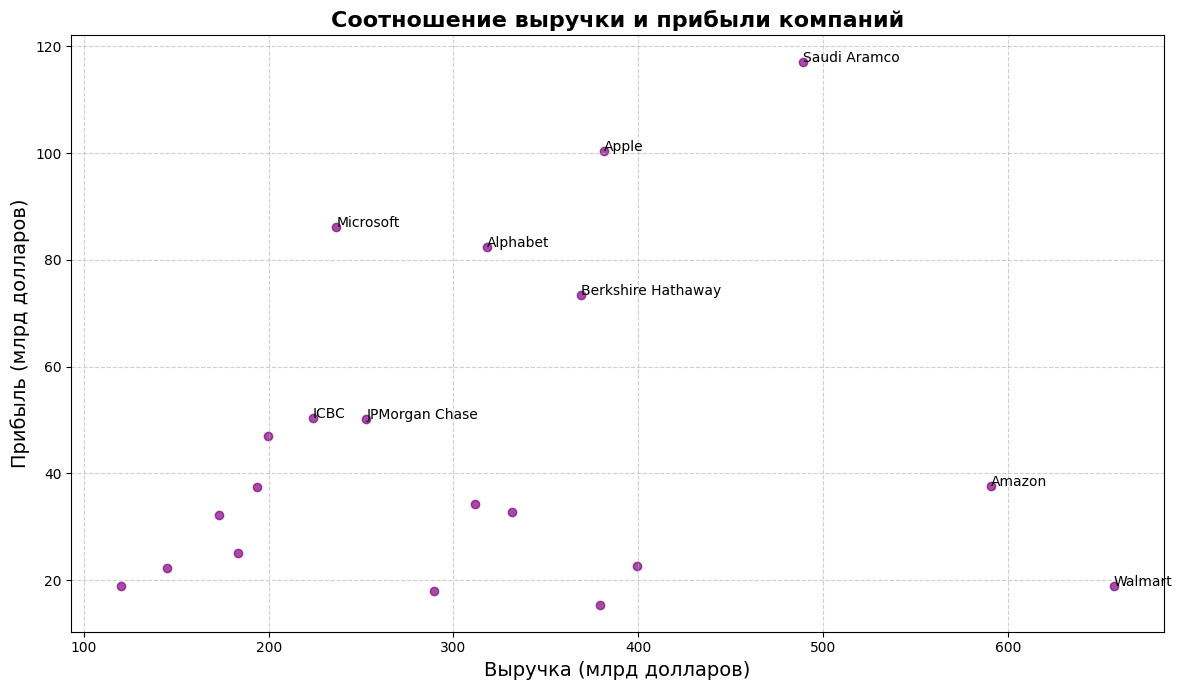

In [94]:
plt.figure(figsize=(12, 7))

# Построение диаграммы рассеяния
plt.scatter(df['выручка'], df['прибыль'], color='purple', alpha=0.7)

# Добавление коментария для нескольких компаний
for i, company in enumerate(df['компания']):
    if df['выручка'][i] > 400 or df['прибыль'][i] > 50:
        plt.text(df['выручка'][i], df['прибыль'][i], company, fontsize=10)

plt.title('Соотношение выручки и прибыли компаний', fontsize=16, fontweight='bold')
plt.xlabel('Выручка (млрд долларов)', fontsize=14)
plt.ylabel('Прибыль (млрд долларов)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [95]:
# Преобразование столбца "Рыночная стоимость" в числовой формат
df['рыночная стоимость'] = df['рыночная стоимость'].astype(str).str.replace(',', '.').replace('nan', '0')
df['рыночная стоимость'] = pd.to_numeric(df['рыночная стоимость'], errors='coerce').fillna(0)

# Суммируем рыночную стоимость по отраслям
industry_market_value = df.groupby('приоритетнаяотрасль')['рыночная стоимость'].sum()


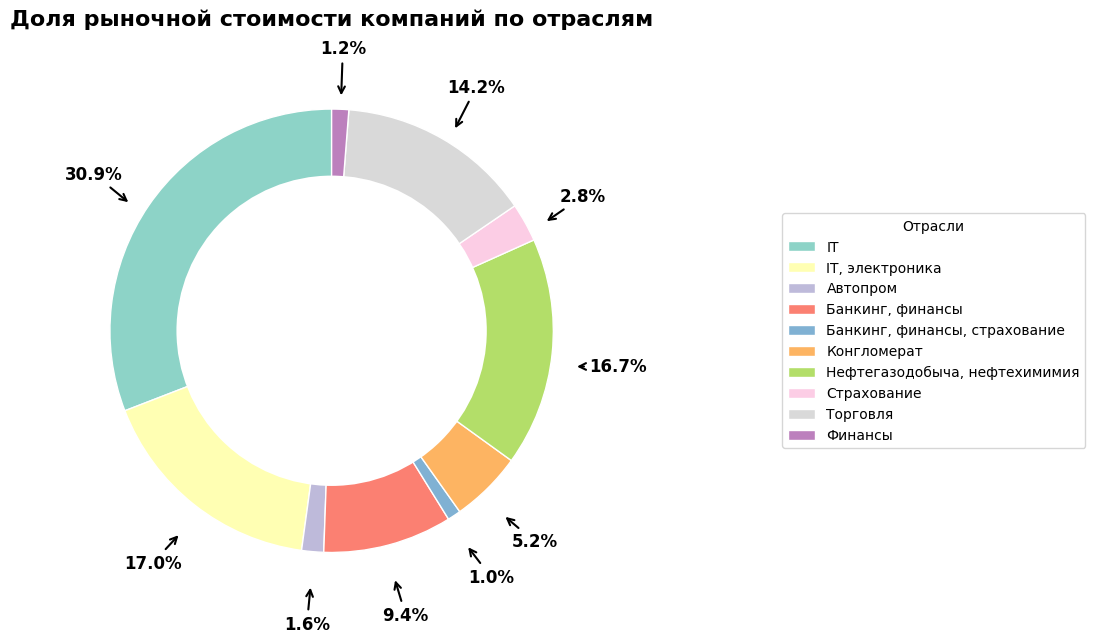

In [107]:
plt.figure(figsize=(10, 8))

# Задание цветовой палитры
colors = plt.cm.Set3.colors

# Построение круговой диаграммы с отступом
wedges, texts = plt.pie(
    industry_market_value,
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Разделение секций белой линией
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# сдвигаем подписи с названиями отраслей
plt.legend(wedges, industry_market_value.index, title="Отрасли", loc="center left", bbox_to_anchor=(1.3, 0, 0.5, 1))

# Настройка заголовка
plt.title('Доля рыночной стоимости компаний по отраслям', fontsize=16, fontweight='bold', pad=20)  # Увеличен отступ заголовка

# Получение центров углов
angles = [0.5 * (wedges[i].theta1 + wedges[i].theta2) for i in range(len(wedges))]

# добавление процентов со стрелками
for i, angle in enumerate(angles):
    x = 1.1 * np.cos(np.radians(angle))
    y = 1.1 * np.sin(np.radians(angle)) - 0.05
    percentage = industry_market_value.iloc[i] / industry_market_value.sum() * 100
    plt.annotate(f'{percentage:.1f}%',
                 xy=(x, y),
                 xytext=(1.3 * np.cos(np.radians(angle)), 1.3 * np.sin(np.radians(angle)) - 0.05),
                 arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
                 fontsize=12,
                 weight='bold',
                 ha='center')

# Код правильного отображения круга
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


In [104]:
# Предварительная обработка данных
df['активы'] = df['активы'].astype(str).str.replace(',', '.').replace('nan', '0')
df['активы'] = pd.to_numeric(df['активы'], errors='coerce').fillna(0)

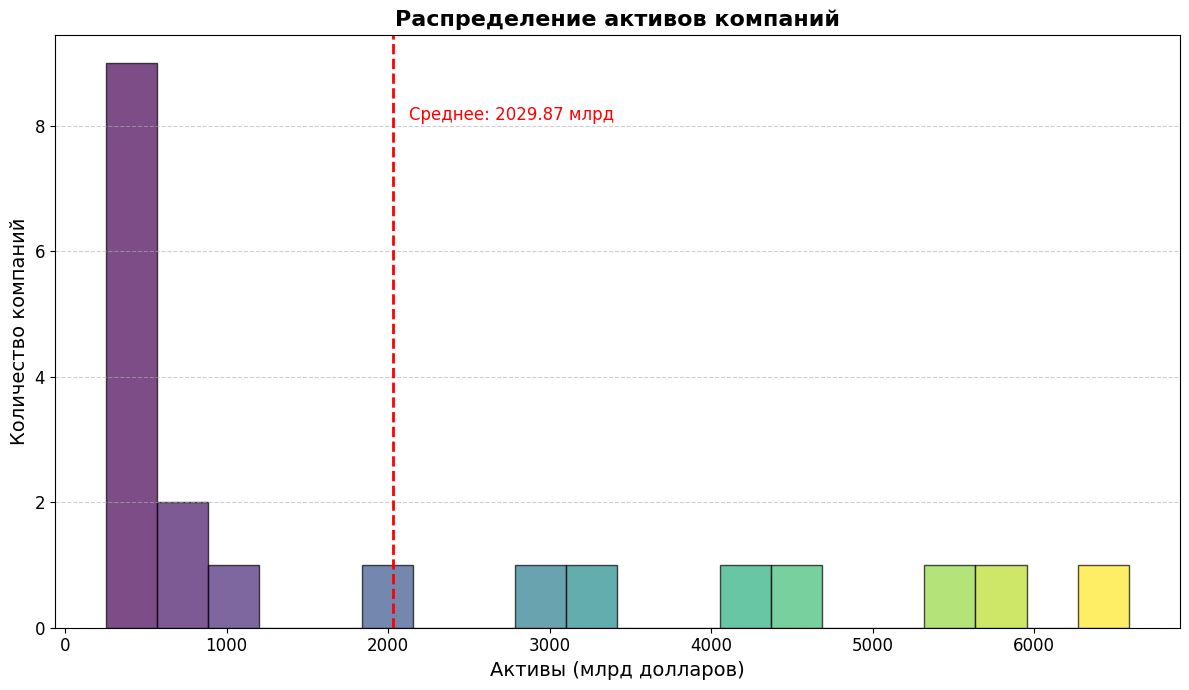

In [105]:
plt.figure(figsize=(12, 7))

# Использование градиентной цветовой палитры
colors = plt.cm.viridis(np.linspace(0, 1, 20))

# Гистограмма с увеличенным количеством бинов и цветовым градиентом
n, bins, patches = plt.hist(df['активы'], bins=20, color='teal', edgecolor='black', alpha=0.7)

# Применение цветового градиента к патчам
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Добавление средней линии
mean_value = df['активы'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_value * 1.05, max(n) * 0.9, f'Среднее: {mean_value:.2f} млрд', color='red', fontsize=12)

# Добавление заголовка и меток осей
plt.title('Распределение активов компаний', fontsize=16, fontweight='bold')
plt.xlabel('Активы (млрд долларов)', fontsize=14)
plt.ylabel('Количество компаний', fontsize=14)

# Увеличение подписей на осях
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Настройка сетки
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Выводы на основе диаграммы распределения активов компаний:
На диаграмме видно, что большинство компаний имеют активы в диапазоне от низких до средних значений. Это указывает на то, что крупные компании с активами в несколько тысяч миллиардов долларов — скорее исключение, чем правило. Большая часть компаний сосредоточена в диапазоне до 2000 миллиардов долларов активов.

Также можно наблюдать, что распределение активов является асимметричным, с длинным "хвостом" справа. Это говорит о том, что есть небольшое количество компаний с чрезвычайно большими активами, что существенно увеличивает разброс данных. Такие компании, как Saudi Aramco или JPMorgan Chase, могут существенно влиять на средние значения.
Красная пунктирная линия на графике показывает среднее значение активов компаний, которое находится в диапазоне выше средней массы данных, что подтверждает наличие значительного числа компаний с активами выше среднего уровня.

Разброс данных: Гистограмма также демонстрирует большой разброс значений активов среди компаний, что свидетельствует о существенной разнице в масштабах бизнеса.

Компании сильно варьируются по размеру активов
Несколько компаний с экстремально высокими активами сильно влияют на среднее значение и создают асимметрию в данных.
Этот график хорошо иллюстрирует структуру активов крупнейших мировых компаний, показывая доминирование нескольких гигантов и наличие значительного количества более мелких компаний.